<a href="https://colab.research.google.com/github/elio-li/CSCI-4964/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 2**

## **Functions**

In [15]:
import matplotlib.pyplot as plt
import networkx as nx
import random
import numpy

In [16]:
# Function to Create a Random Network Based on:
#  N - number of nodes
#  p - probability
def create_random_graph(N,p):
  # adjacency list with N nested lists
  G = [[] for i in range(N)]

  # for every links between each node
  for i in range(0, N):
    for j in range(i, N):
      # if p is greater than random generated number & it's not it self.
      if (random.uniform(0, 1) < p) & (i != j):
        G[i].append(j)
  return G

In [17]:
# Calculate the Number of Edges in a Graph Given:
#  G - adjacency list of a graph, 2D list
def edgeCounts(G):
  count = 0
  for i in G:
    count += len(i)
  return count

In [25]:
# Convert Adjacency List to Networkx Object, Using:
#  list - adjacency list of a graph, 2D list
def ListToNetworkx(list):
  G = nx.Graph()
  # add nodes
  for i in range(len(list)):
	  G.add_node(i)
  # add edges
  for i in range(len(list)):
    for j in list[i]:
      G.add_edge(i, j)
  return G

## **Question A**

Generate a random network with model G(N, p) where N is the number of nodes and p is the linking probability.

---

**Below is an Example Output, for Implementations Pls See Above*

In [22]:
pa = input("Enter Probability p: ")
pa = float(pa)
Na = input("Enter Number of Nodes N: ")
Na = int(Na)

# Print the predicted edges
print("Predicted number of edges: ", int((pa * Na * (Na - 1)) / 2))

Ga = create_random_graph(Na,pa)
print("Actual number of edges: " + str(edgeCounts(Ga)))

Enter Probability p: 0.4
Enter Number of Nodes N: 60
Predicted number of edges:  708
Actual number of edges: 715


## **Question B**

Produce and visualize a random network with G(N = 500, p = 0.01), and plot the degree distribution of the network. (Include the data of this network. Explain the format you save the network.)

---

Graph is store in the format of an adjacency list, example:

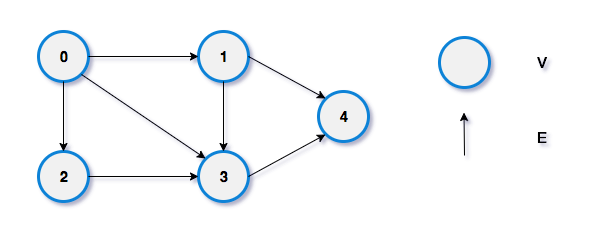

`G = [[1,2,3], [3,4], [3], [4], []]`

In [23]:
Gb = create_random_graph(500,0.01)

In [30]:
# Write List for Submission
file = open("qb_adjlist.txt", "w")
for i in Gb:
  file.write(str(i) + "\n")
file.close()

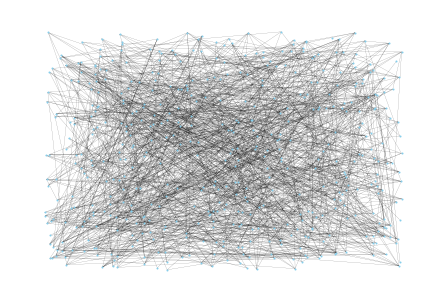

In [26]:
# to visualize the graph, the adjacency list needs to be converted to the networkx graph object
nx_Gb = ListToNetworkx(Gb)

nx.draw(nx_Gb, 
        node_color='skyblue', node_size=1, 
        width=0.1, edge_cmap=plt.cm.OrRd,
        arrowstyle='->',arrowsize=0.1,
        pos=nx.random_layout(G, seed=13))

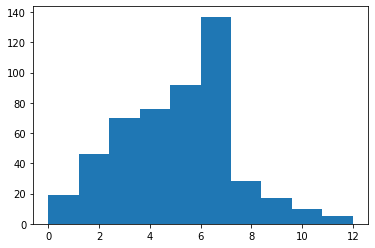

In [27]:
degrees = [nx_Gb.degree(n) for n in nx_Gb.nodes()]
plt.hist(degrees)
plt.show()

## **Question C**

Produce and 500 random networks with G(N = 10, 000, p = 0.001) and count the number of links, Li (i = 1,2,...,100), in network i. Then, plot the distribution of L. (Include the list of Li, but do not submit the data of the networks.)

---

In [31]:
numLinksc = []
# Generate 500 Random Networks
for i in range(500):
  Gc = nx.generators.random_graphs.fast_gnp_random_graph(10000,0.001)
  num_links = Gc.number_of_edges()
  numLinksc.append(num_links)

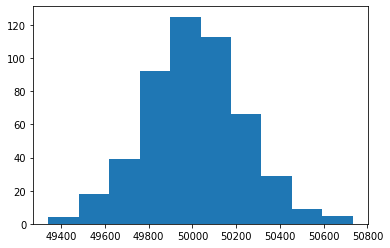

In [32]:
plt.hist(numLinksc)
plt.show()

## **Question D**

Generate a random network with model G(N, k) where N is the number of nodes and k is the average degree of this network.

---

Since k is $<k> = p(N-1)$, $p = \frac{<k>}{N-1}$.

In [33]:
kd = input("Enter Average Degree k: ")
kd = int(kd)
Nd = input("Enter Number of Nodes N: ")
Nd = int(Nd)

print("The probability of the graph is: ", kd/(Nd-1))

Gd = create_random_graph(Nd,kd/(Nd-1))
print("Number of edges: " + str(edgeCounts(Gd)))

Enter Average Degree k: 10
Enter Number of Nodes N: 300
The probability of the graph is:  0.033444816053511704
Number of edges: 1495


## **Question E**

Produce and visualize a random network with G(N = 500, k = 10), and plot the degree distribution of the network. (Include the data of this network. Explain the format you save the network. )

---

Using the method wrote in question a, each node and edge are placed in the networkx graph object.

In [34]:
Ge = create_random_graph(500,10/(500-1))

In [45]:
# Write List for Submission
file = open("qe_adjlist.txt", "w")
for i in Ge:
  file.write(str(i) + "\n")
file.close()

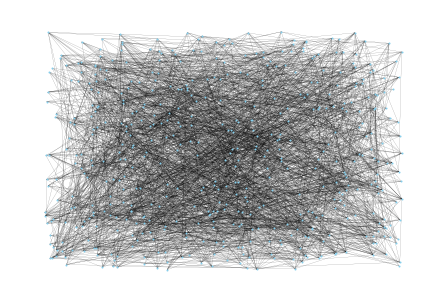

In [35]:
# to visualize the graph, the adjacency list needs to be converted to the networkx graph object
nx_Ge = ListToNetworkx(Ge)

nx.draw(nx_Ge, 
        node_color='skyblue', node_size=1, 
        width=0.1, edge_cmap=plt.cm.OrRd,
        arrowstyle='->',arrowsize=0.1,
        pos=nx.random_layout(G, seed=13))

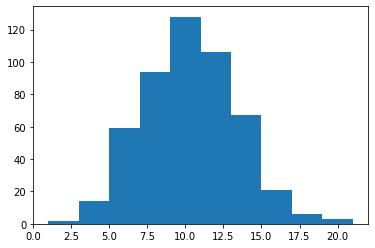

In [36]:
degrees = [nx_Ge.degree(n) for n in nx_Ge.nodes()]
plt.hist(degrees)
plt.show()

## **Question F**

Randomly remove 50% of nodes from the network in b), calculate the average degree of the rest of the network.

---

In [46]:
Gf = ListToNetworkx(Gb)

Nodes_f = Gf.nodes()
NodesCount_f = Gf.number_of_nodes()
RandomNodes_f = random.sample(Nodes_f, 250)

In [47]:
Gf.remove_nodes_from(RandomNodes_f)

In [48]:
TotalNodes_f = Gf.number_of_nodes()
TotalEdges_f = Gf.number_of_edges()
print("Total Nodes: ", TotalNodes_f, "\nTotal Edges: ", TotalEdges_f)

Total Nodes:  250 
Total Edges:  328


In [49]:
AverageDegree_f = TotalEdges_f/TotalNodes_f
print("Average Degree of the Graph is: ", AverageDegree_f)

Average Degree of the Graph is:  1.312


## **Question G**

What are the sizes of largest cluster and second largest cluster in the rest of network in f)?

---

In [50]:
ClusterLists_g = []
for c in nx.connected_components(Gf):
  ClusterLists_g.append(len(c))

In [51]:
ClusterLists_g

[216,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1]

In [52]:
import heapq
heapq.nlargest(2, ClusterLists_g)

[216, 3]

The largest connected component have 216 nodes, where the second largest one contains only 3 nodes.

## **Question H**

Randomly remove 70% of nodes from the network in e), calculate the average degree of the rest of the network.

---

In [53]:
Gh = ListToNetworkx(Ge)
Nodes_h = Gh.nodes()
NodesCount_h = Gh.number_of_nodes()
RandomNodes_h = random.sample(Nodes_h, 150)

In [54]:
Gh.remove_nodes_from(RandomNodes_h)

In [55]:
TotalNodes_h = Gh.number_of_nodes()
TotalEdges_h = Gh.number_of_edges()
print("Total Nodes: ", TotalNodes_h, "\nTotal Edges: ", TotalEdges_h)

Total Nodes:  350 
Total Edges:  1230


In [56]:
AverageDegree_h = TotalEdges_h/TotalNodes_h
print("Average Degree of the Graph is: ", AverageDegree_h)

Average Degree of the Graph is:  3.5142857142857142


## **Question I**

What are the sizes of largest cluster and second largest cluster in the rest of network in h).

---

In [57]:
ClusterLists_i = []
for c in nx.connected_components(Gh):
  ClusterLists_i.append(len(c))

In [58]:
ClusterLists_i

[350]

In [59]:
import heapq
heapq.nlargest(2, ClusterLists_i)

[350]

The network is FULLY connected, thus have 350 nodes contained as the largest cluster.